In [2]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

In [27]:
header = 'filename chroma_stft rmse spectral_centroid spectral_bandwidth rolloff zero_crossing_rate'

In [28]:
for i in range(1, 21):
    header += f' mfcc{i}'

In [29]:
header += ' label'
header = header.split()

In [30]:
print(len(header))
header

28


['filename',
 'chroma_stft',
 'rmse',
 'spectral_centroid',
 'spectral_bandwidth',
 'rolloff',
 'zero_crossing_rate',
 'mfcc1',
 'mfcc2',
 'mfcc3',
 'mfcc4',
 'mfcc5',
 'mfcc6',
 'mfcc7',
 'mfcc8',
 'mfcc9',
 'mfcc10',
 'mfcc11',
 'mfcc12',
 'mfcc13',
 'mfcc14',
 'mfcc15',
 'mfcc16',
 'mfcc17',
 'mfcc18',
 'mfcc19',
 'mfcc20',
 'label']

In [31]:
file = open('data.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)

In [8]:
genres = 'Clap ClosedHat Crash Kick OpenHat Ride Snare Tom'.split()

In [37]:
numfiles = 22354
progress = 0
marker = .02

In [38]:
for g in genres:
    for filename in os.listdir(f'./DrumData/{g}'):
        songname = f'./DrumData/{g}/{filename}'
        try:
            y, sr = librosa.load(songname, mono=True)
        except Exception as e:
            progress += 1
            print(f"Skipping {filename} because of " + str(e))
            continue
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rmse(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        filename = filename.strip().replace(" ", "")
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())
        progress += 1
        if progress/numfiles > marker:
            print(f"{progress}/{numfiles}", progress/numfiles)
            marker += .02


448/22354 0.0200411559452447
Skipping Clap Ame.wav because of not a whole number of frames
Skipping Clap ChrisLiebing.wav because of not a whole number of frames
Skipping Clap Crystal.wav because of not a whole number of frames
895/22354 0.04003757716739734
1342/22354 0.06003399838954997
1789/22354 0.0800304196117026
2236/22354 0.10002684083385524
Skipping desktop.ini because of 
2683/22354 0.12002326205600787
3130/22354 0.1400196832781605
Skipping ClosedHH Ame.wav because of not a whole number of frames
3577/22354 0.16001610450031314
Skipping ClosedHH Funkstorung B.wav because of not a whole number of frames
4024/22354 0.1800125257224658
4471/22354 0.2000089469446184
Skipping ClosedHH Spasm 1.wav because of Input signal length=1 is too small to resample from 44100->22050
4918/22354 0.22000536816677105
Skipping ClosedHH TelAviv 1.wav because of not a whole number of frames
Skipping desktop.ini because of 
5365/22354 0.2400017893889237
5813/22354 0.2600429453341684
6260/22354 0.28003936

ValueError: There aren't any elements to reflect in axis 0 of `array`

In [39]:
g = "Tom"
for filename in os.listdir(f'./DrumData/{g}'):
        songname = f'./DrumData/{g}/{filename}'
        try:
            y, sr = librosa.load(songname, mono=True)
        except Exception as e:
            progress += 1
            print(f"Skipping {filename} because of " + str(e))
            continue
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rmse(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        filename = filename.strip().replace(" ", "")
        to_append = f'{filename} {np.mean(chroma_stft)} {np.mean(rmse)} {np.mean(spec_cent)} {np.mean(spec_bw)} {np.mean(rolloff)} {np.mean(zcr)}'    
        for e in mfcc:
            to_append += f' {np.mean(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())
        progress += 1
        if progress/numfiles > marker:
            print(f"{progress}/{numfiles}", progress/numfiles)
            marker += .02

Skipping desktop.ini because of 
21460/22354 0.9600071575556948


In [40]:
data = pd.read_csv('data.csv')
# data.head()



In [41]:
data.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,01ClapBMB.WAV,0.618883,0.119291,3065.714055,2460.566711,5862.414551,0.161784,-56.772178,48.711372,-59.552208,...,-3.123486,-7.359495,3.144433,-3.356684,4.992271,2.515457,9.465140,-0.621855,5.238568,Clap
1,01#03ds03.wav,0.635330,0.037196,3693.867336,2636.259493,6678.555575,0.196481,-421.383672,28.779544,-37.877411,...,-1.454617,-2.989339,1.468267,-0.738073,-2.872931,-3.265541,5.980502,-1.427013,2.857505,Clap
2,01#03ds04.wav,0.629891,0.046015,3590.197924,2605.403598,6587.059356,0.200886,-363.669516,25.263142,-37.137436,...,-1.929337,-1.920452,2.100165,-2.999123,-0.400314,-1.693672,3.565656,-1.433910,1.827394,Clap
3,02ClapBMB.WAV,0.434298,0.155422,2418.015677,2001.283210,4326.379395,0.123698,-168.246688,53.183609,-86.767207,...,5.611905,0.129062,4.257509,-0.471195,0.753118,-2.098963,4.158339,0.640163,3.054923,Clap
4,02.Clap.wav,0.536626,0.014460,5998.845143,3263.768485,9358.270264,0.401923,-441.632454,-10.441482,54.436183,...,4.379537,-0.004708,5.425863,3.019330,9.410884,2.498261,4.078138,0.661409,5.287163,Clap


In [42]:
data = data.drop(['filename'],axis=1)
data.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.618883,0.119291,3065.714055,2460.566711,5862.414551,0.161784,-56.772178,48.711372,-59.552208,-19.775777,...,-3.123486,-7.359495,3.144433,-3.356684,4.992271,2.515457,9.465140,-0.621855,5.238568,Clap
1,0.635330,0.037196,3693.867336,2636.259493,6678.555575,0.196481,-421.383672,28.779544,-37.877411,-2.279165,...,-1.454617,-2.989339,1.468267,-0.738073,-2.872931,-3.265541,5.980502,-1.427013,2.857505,Clap
2,0.629891,0.046015,3590.197924,2605.403598,6587.059356,0.200886,-363.669516,25.263142,-37.137436,-1.053125,...,-1.929337,-1.920452,2.100165,-2.999123,-0.400314,-1.693672,3.565656,-1.433910,1.827394,Clap
3,0.434298,0.155422,2418.015677,2001.283210,4326.379395,0.123698,-168.246688,53.183609,-86.767207,-43.990146,...,5.611905,0.129062,4.257509,-0.471195,0.753118,-2.098963,4.158339,0.640163,3.054923,Clap
4,0.536626,0.014460,5998.845143,3263.768485,9358.270264,0.401923,-441.632454,-10.441482,54.436183,7.500737,...,4.379537,-0.004708,5.425863,3.019330,9.410884,2.498261,4.078138,0.661409,5.287163,Clap


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [43]:
genre_list = data.iloc[:, -1]

In [46]:
encoder = LabelEncoder()

In [47]:
y = encoder.fit_transform(genre_list)
print(y)

[0 0 0 ... 7 7 7]


In [1921]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
import keras
from keras import models
from keras import layers


Using TensorFlow backend.


In [63]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [70]:
history = model.fit(X_train,
                    y_train,
                    epochs=40,
                    batch_size=128)

Epoch 1/40
17438/17438 [==============================] - 0s 12us/step - loss: 0.0246 - acc: 0.9918
Epoch 2/40
17438/17438 [==============================] - 0s 11us/step - loss: 0.0565 - acc: 0.9822
Epoch 3/40
17438/17438 [==============================] - 0s 11us/step - loss: 0.0310 - acc: 0.9892
Epoch 4/40
17438/17438 [==============================] - 0s 12us/step - loss: 0.0131 - acc: 0.9962
Epoch 5/40
17438/17438 [==============================] - 0s 11us/step - loss: 0.0125 - acc: 0.9962
Epoch 6/40
17438/17438 [==============================] - 0s 11us/step - loss: 0.0120 - acc: 0.9961
Epoch 7/40
17438/17438 [==============================] - 0s 12us/step - loss: 0.0197 - acc: 0.9941
Epoch 8/40
17438/17438 [==============================] - 0s 12us/step - loss: 0.0137 - acc: 0.9959
Epoch 9/40
17438/17438 [==============================] - 0s 11us/step - loss: 0.0136 - acc: 0.9958
Epoch 10/40
17438/17438 [==============================] - 0s 11us/step - loss: 0.0209 - acc: 0.9943

In [1888]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)


4360/4360 [==============================] - 0s 13us/step
test_acc:  0.8628440366972477


In [1899]:
pp = X_test[4]
qq = y_test[4]

In [1901]:
pp

array([ 0.18781988,  0.20288142, -1.18898722, -1.13899211, -1.42246204,
       -1.01882222, -0.24785489,  0.66728939,  1.03053992,  0.76106121,
        1.04206064,  0.6012728 ,  0.91796121,  0.54675949,  0.7813259 ,
        0.3069026 ,  0.55404046, -0.05247166,  0.3912065 ,  0.10919258,
        0.69200098,  0.27339466,  0.73803199,  0.29647445,  0.82429434,
        0.20828077])

In [73]:
predictions = model.predict(X_test)
np.argmax(predictions[0])

4

In [76]:
X_test.shape

(4360, 26)

In [1917]:

pp = np.array(data.loc[i, :])[:-1]

In [1925]:
data.loc[i,][-1]

'Tom'

In [1900]:
q = model.predict( np.array( [pp,] )  )
print(np.argmax(q[0]), qq)


3 3


In [1920]:
pp

array([0.664380889947673, 0.033183366060256965, 673.3654229870945,
       1595.9312613189481, 1172.9262408088236, 0.007525275735294119,
       -525.5414732833883, 39.09388487896712, 22.395787706170445,
       22.342520935939717, 11.89797465312896, 10.130637787519774,
       7.888358022436094, 7.321712162531238, 7.226473738928242,
       7.007880890992723, 6.781425382577092, 6.422900417512118,
       4.927550288708329, 3.1661403131621952, 1.4510287352563074,
       0.9253916097869704, 0.8597279007576996, 0.8491050152324691,
       -1.8815947620225104, -1.82047554913064], dtype=object)

In [1923]:
ppp=  scaler.transform([pp])

In [1924]:
ppp

array([[ 0.90851872, -0.68125912, -1.06033883, -0.52388938, -1.18538927,
        -1.02368549, -0.96221848,  0.27736816,  0.46890869,  0.30390475,
         0.47295775,  0.01897937,  0.4682299 ,  0.12219306,  0.5712996 ,
         0.24794112,  0.70598601,  0.36597173,  0.65352342, -0.00206112,
         0.18238242, -0.39853939,  0.20994969, -0.27237724, -0.20938923,
        -0.79803732]])

In [1929]:
q = model.predict_proba( ppp )
np.argmax(q[0])

7

In [350]:
c = {0: "Clap",
     1: "ClosedHat",
     2: "Crash",
     3: "Kick",
     4: "OpenHat",
     5: "Ride",
     6: "Snare",
     7: "Tom"}

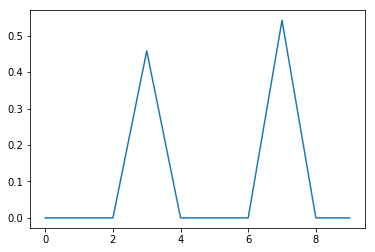

In [1932]:
plt.plot(q[0])
plt.show()

In [1933]:
from keras.models import load_model

In [1934]:
model.save('drum_model.h5')

In [1935]:
# # returns a compiled model
# # identical to the previous one
# model = load_model('my_model.h5')

array([ 5.33531550e-01,  1.02728171e-01,  2.94393148e+03,  2.02118890e+03,
        4.96737514e+03,  1.85446747e-01, -3.69993012e+02,  2.08221208e+01,
        5.62234611e+00,  1.54912743e+01,  2.16237948e+00,  9.86794700e+00,
        1.09400785e+00,  6.00152333e+00,  1.09037008e+00,  4.99338286e+00,
        7.24328280e-01,  3.94341928e+00,  4.20984287e-02,  3.17872873e+00,
        2.74627425e-01,  3.13753161e+00, -3.41061943e-01,  2.20688790e+00,
       -7.62373183e-01,  1.93493977e+00])

In [1936]:
from sklearn.externals import joblib


In [1937]:
scaler_filename = "scaler.save"

In [1938]:
joblib.dump(scaler, scaler_filename)
# scaler = joblib.load(scaler_filename) 

['scaler.save']